In [2]:
import tensorflow as tf
import os
import numpy as np

In [3]:
base_dir=r"C:\Users\skv96\Downloads\archive\training_set\training_set"
#"C:\Users\skv96\Downloads\archive\training_set\training_set"

In [4]:
image_size = 224
batch_size = 128

# for training the data

train_dg= tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

# for testing the data

validation_dg = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [5]:
# for training data set

training_generator = train_dg.flow_from_directory(
    base_dir,
    target_size = (image_size,image_size),
    batch_size = batch_size,
    subset = 'training'
)

# for testing
validation_generator = validation_dg.flow_from_directory(
    base_dir,
    target_size = (image_size,image_size),
    batch_size = batch_size,
    subset = 'validation'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


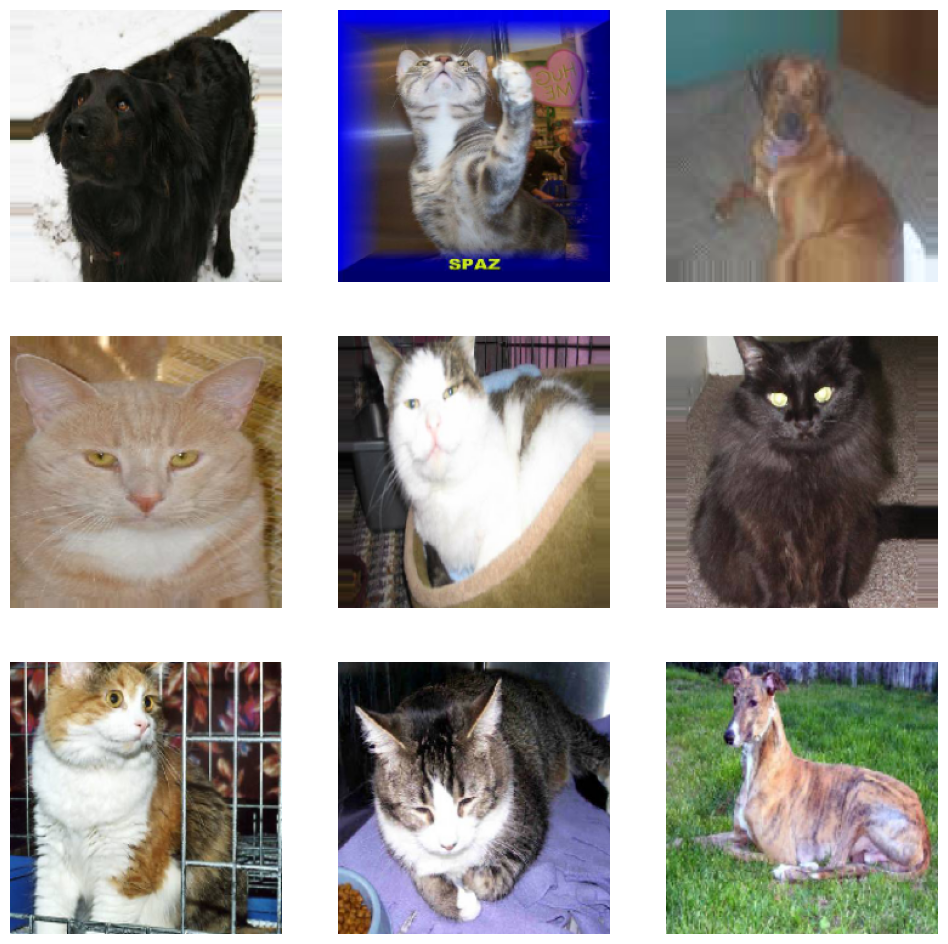

In [6]:
import matplotlib.pyplot as plt

# Function to visualize a batch of images
def visualize_images(generator):
    images, labels = next(generator)  # Get a batch of images and labels from the generator
    plt.figure(figsize=(12, 12))
    
    # Display 9 images from the batch
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    
    plt.show()

# Visualizing a batch from the training generator
visualize_images(training_generator)



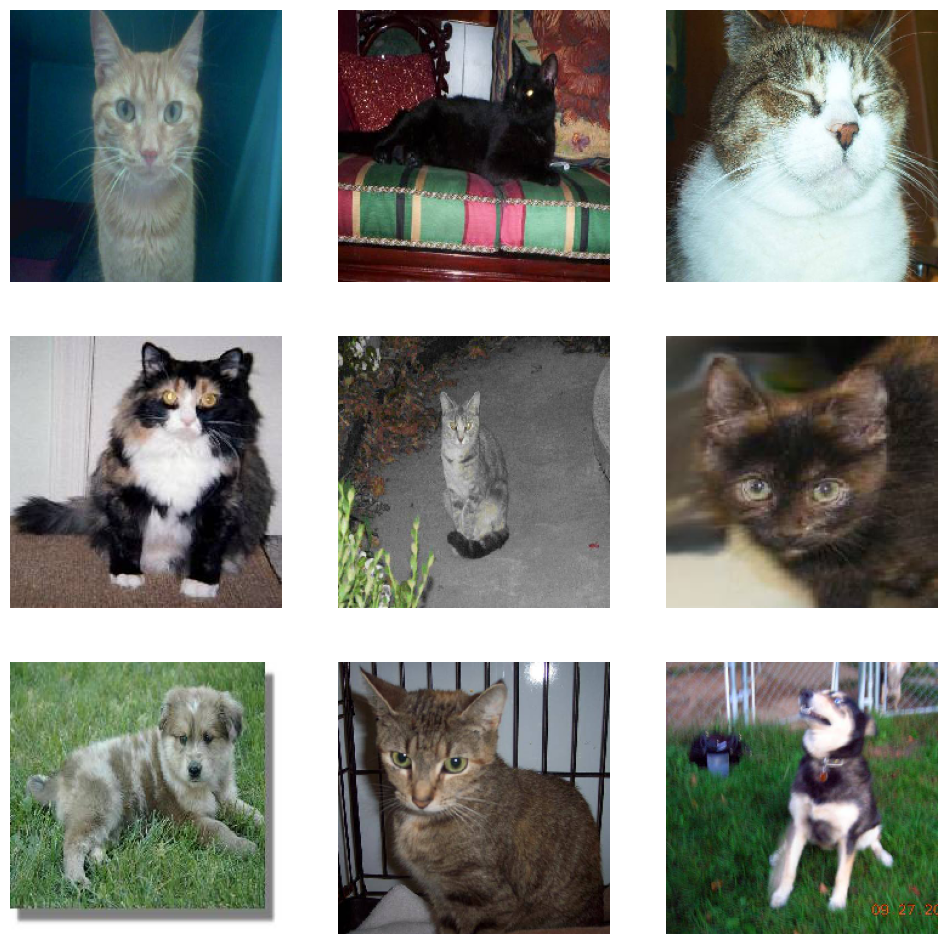

In [7]:
visualize_images(validation_generator)

In [8]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [9]:
image_size = [224,224]
vgg = VGG16(input_shape = image_size+[3],weights='imagenet', include_top=False) #  #image size 224*244*  and the 3 is 3 channel RGB and weight are similar to to imagenet dataset pre trained
vgg.output               # downloading the model

<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_18>

In [10]:
#Now when you set the trainable property of a model as False it would skip the weight update step.

for layer in vgg.layers:
    layer.trainable = False

In [11]:
folders=glob(r"C:\Users\skv96\Downloads\archive\training_set\training_set\*")
print(len(folders))

2


In [12]:
x = Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model = Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
epoch=1

history=model.fit(training_generator,
                  steps_per_epoch=len(training_generator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

51/51 ━━━━━━━━━━━━━━━━━━━━ 2052s 40s/step - accuracy: 0.9114 - loss: 0.2250 - val_accuracy: 0.9188 - val_loss: 0.2056


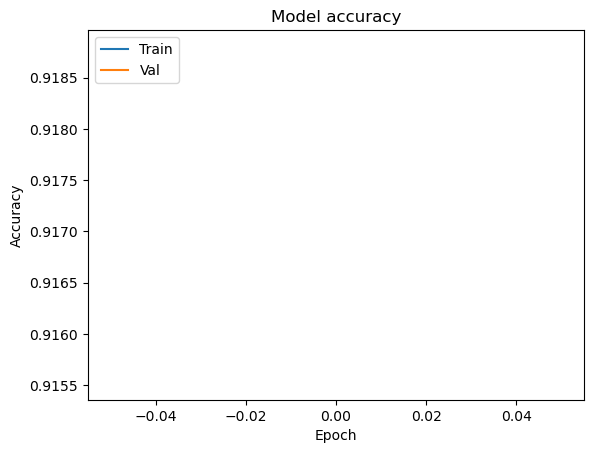

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

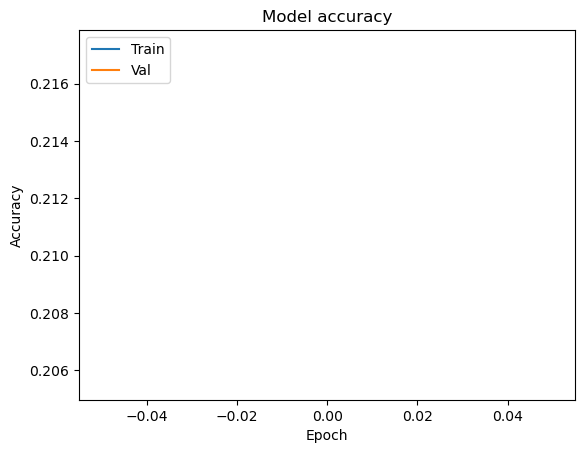

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

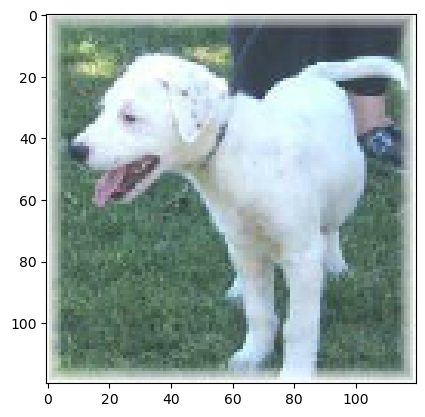

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image

# load the image
img = load_img(r"C:\Users\skv96\Downloads\archive\test_set\test_set\dogs\dog.4989.jpg", target_size=(120,120))

# convert to array
img = img_to_array(img)

# center pixel data
img = img / 255.0

# show the image
plt.imshow(np.uint8(img*255))
plt.show()

In [43]:
img_pred=image.load_img(r"C:\Users\skv96\Downloads\archive\test_set\test_set\dogs\dog.4989.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="cat"
    
    
else:
    prediction="dog"
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0. 1.]]
dog
